В этом модуле мы начинаем знакомство с моделями машинного обучения. Как вы уже знаете, существует множество алгоритмов, позволяющих решать различные прикладные задачи.

В первую очередь класс модели определяется категорией обучения. В этом модуле мы поговорим о тех алгоритмах, которые относятся к категории обучения с учителем, а именно — к задаче регрессии.

<img src='img/dst3-ml1-3_2.jpg'>

В категории обучения с учителем модели можно условно разделить на следующие основные типы:

- Линейные модели: линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
- «Древесные» модели: дерево решений и производные от него. 
- Метрические алгоритмы: метод ближайших соседей и производные от него.
- Байесовские методы: метод наивного Байеса и производные от него.
- Ансамблевые методы: композиции из методов (бэггинг, стекинг, бустинг).

В этом модуле мы поговорим о линейных моделях (но на самом деле ими не ограничимся), которые позволяют решать задачу регрессии.

`Линейные модели` — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

<img src='img/dst3-ml1-3_3.jpg'>

> На данном графике мы видим зависимость цены товара от его размера. Из диаграммы рассеяния видно, что в среднем точки расположены на одной прямой линии. То есть зависимость линейная.

Подкласс линейных моделей в свою очередь содержит множество конкретных моделей. В библиотеке `sklearn`, которую мы будем использовать, все линейные алгоритмы содержатся в модуле [linear_model](https://scikit-learn.ru/1-1-linear-models/). 

Цели данного модуля:

- Познакомиться с принципами работы модели линейной регрессии для решения задачи регрессии.
- Рассмотреть аналитическое (метод наименьших квадратов) и численное (градиентный спуск) решение задачи поиска параметров модели.
- Познакомиться с метриками регрессии.
- Изучить понятия `bias` и `variance` и понять причины недообучения и переобучения линейной регрессии.
- Рассмотреть полиномиальную регрессию как метод усложнения модели.
- Познакомиться с `регуляризацией` и рассмотреть её основные методы.
- Научиться решать задачи регрессии.

### 1. Аналитическое решение

Для начала давайте вспомним, что такое задача регрессии в машинном обучении.

> `Регрессия` — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо `предсказать` `числовую целевую переменную`.

`Цель обучения` — построить модель, которая бы отражала зависимость между признаками и целевой числовой переменной.

Когда зависимость принимается линейной, такая модель называется `линейной регрессией`.

### ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛИНЕЙНОЙ РЕГРЕССИИ

`Линейная регрессия` (Linear Regression) — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

<img src='img/dst3-ml1-3_6.jpg'>

$\hat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{m}x_{m}$

Давайте разбираться, что в этом выражении значит каждая из переменных. Начнём с простого — с двумерного случая.

#### 2D-Случай

Для начала поговорим о самом простом случае, когда у нас есть один фактор и зависящий от него целевой признак. Геометрически такая зависимость представляет собой координатную плоскость, где мы отмечаем точки по оси x и соответствующие им точки на оси y.

> Рассмотрим задачу из нефтяной отрасли. Есть набор данных, где представлены данные о средней пористости скважин (в процентах) и добыче газа на этих скважинах в сутки (в миллионах кубических футов). 

Нам бы хотелось построить модель, которая опишет зависимость и позволит по известной пористости скважин предсказывать неизвестную выработку газа.

Зависимость целевого признака от фактора представлена на диаграмме рассеяния (см. ниже). Пористость скважины отложена по оси абсцисс — Porosity (%), а добыча газа — по оси ординат, Gas production (Mcf/day).

Из диаграммы (не представлена) отчётливо видно, что с ростом пористости скважины растёт добыча газа. Причём растёт она преимущественно линейно: основная масса точек находится на одной прямой.

Идея! Давайте проведём через точки прямую линию так, чтобы она максимально хорошо описывала зависимость.

Для этого сначала вспомним уравнение прямой из школьного курса математики:

$y = kx + b$

где:

- $x$ — это некоторый фактор, от которого зависит целевая переменная $y$. В нашем случае, $x$ — это пористость скважины, а $y$ — добыча газа.
- $k$ — коэффициент наклона прямой (тангенс угла наклона). Если $k > 0$, это означает, что угол наклона прямой острый и прямая возрастает. Если $k < 0$, угол наклона тупой и прямая убывает.
- $b$ — коэффициент смещения прямой по оси $y$. Он будет соответствовать значению $y$ при $x = 0$. То есть это точка пересечения прямой и оси $Y$.

<img src='img/dst3-ml1-3_4.jpg'>

На данном графике изображены две прямые с разными коэффициентами наклона. Зелёная прямая соответствует положительному значению $k_1 > 0$, и геометрически $k_1$ равен тангенсу острого угла $\alpha_1$ наклона прямой по отношению к оси $x$: $k_1 = \tg(\alpha_1)$. Синяя прямая соответствует отрицательному значению $k_2 < 0$, и геометрически $k_2$ равен тангенсу тупого угла $\alpha_2$ наклона прямой по отношению к оси $x$: $k_2 = \tg(\alpha_2)$. Каждая из прямых пересекается с осью $y$ в точках $b_1$  и $b_2$ — это и есть **коэффициент смещения прямых**.

Это уравнение и есть двумерная модель линейной регрессии. Зная коэффициенты $k$ и $b$, мы можем подставить в него любую пористость скважины x и получить предсказание добычи газа $y$.

Однако в машинном обучении приняты немного другие обозначения. Фактическое значение целевой переменной обозначается как $y$, а вот предсказанное моделью — $\hat{y}$. Также для удобства коэффициенты $b$ и $k$ приведём к единому обозначению: $w_0 = b$ и $w_1 = k$. Тогда уравнение модели линейной регрессии запишется в виде:

$\hat{y} = w_0 + w_1x$

> Примечание. Коэффициенты $w_0$ и $w_1$ называются параметрами линейной регрессии.

Остаётся только один вопрос: откуда, собственно, взять параметры $w_0$ и $w_1$? Обсудим этот вопрос чуть позже.

А пока представим, что параметры мы нашли. В таком случае можно построить прямую, которая опишет нашу зависимость. Пусть коэффициенты составляют (мы их нашли сами по методу наименьших квадратов, о котором поговорим ниже):

$w_0 = -2.94$

$w_1 = 287.7$

Тогда модель будет иметь следующий вид:

$\hat{y} = 287.7x - 2.94$

Если подставлять конкретные значения пористости $x$ в модель, можно построить прямую, которая описывает исходную зависимость. Это и будет графическая интерпретация нашей модели:

<img src='img/dst3-ml1-3_5.jpg'>

#### 3D-случай

Теперь представим, что у нас не один фактор, а два. Например, помимо пористости скважины, мы дополнительно знаем ещё и о её хрупкости в процентах. То есть у нас теперь есть два фактора: $x_1$ — пористость и $x_2$ — хрупкость.

Можно отобразить такую зависимость добычи газа от этих факторов в трёхмерном пространстве в виде диаграммы рассеяния:

<img src='img/dst3-ml1-3_7.jpg'>

В таком случае в выражение для модели добавится ещё одна переменная $x_2$ и соответствующий ей коэффициент $w_2$:

$\hat{y} = w_0 + w_1x_1 + w_2x_2$

Опять же, представим, что параметры модели мы нашли и они равны:

$w_0 = -2003$

$w_1 = 302.3$

$w_2 = 31.38$

Тогда модель будет иметь следующий вид:

$\hat{y} = 302.3x_1 + 31.38x_2 - 2003$

Это была алгебра — теперь перейдём к геометрии. Геометрически данное уравнение описывает плоскость в трёхмерном пространстве с осями $x_1$ и $x_2$, $w_0$ — смещение плоскости по вертикальной оси, а коэффициенты $w_1$ и $w_2$ — коэффициенты наклона этой плоскости к осям $x_1$ и $x_2$. 

То есть это будет плоскость, которая подстроена под точки в трёхмерном пространстве:

<img src='img/dst3-ml1-3_8.jpg'>

#### Общий случай

А что если факторов не два, а больше: 3, 15, 100? Тут-то мы и приходим к общему виду модели линейной регрессии, который вводили в самом начале. Пусть у нас есть $m$ факторов $\{x_1, x_2, ..., x_m\}$, от которых зависит целевая переменная $y$.


$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_mx_m = w_0 = \sum_{j=1}^{m}w_jx_j$

В геометрическом смысле данное уравнение описывает плоскость в $m+1$-мерном пространстве ($m$ факторов + 1 целевой признак отложены по осям координат). Такую плоскость называют гиперплоскостью.

Абстрактное $m+1$-мерное пространство, конечно же, невозможно отобразить графически и сложно даже представить, как оно выглядит. Но нам это и не нужно. Все операции в таком пространстве аналогичны операциям в двумерном или трёхмерном пространстве.

> Для понимания принципа работы мы будем рассматривать только прямую в двумерном пространстве, а результат уже обобщать на случай с большей размерностью.

Стоит отметить, что в DS мы, как правило, работаем с большим количеством факторов (больше двух), которые описывают данные, поэтому отобразить модель в геометрическом пространстве не получится, но важно понимать, что представляет собой сама модель.

#### ПОИСК ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ: МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

> Теперь мы знаем, как выглядит модель линейной регрессии в общем случае: это простое линейное выражение, подставляя в которое значения факторов, можно найти целевую переменную. Это линейное выражение соответствует прямой, плоскости или гиперплоскости в зависимости от количества признаков.

Остаётся вопрос: откуда взять коэффициенты, которые стоят при $x$?

Прямую же можно провести как угодно. Вот например несколько прямых, построенных с различными случайными коэффициентами:

<img src='img/dst3-ml1-3_9.jpg'>

Какие параметры будут наилучшими?

Для ответа на этот вопрос давайте вспомним схему обучения моделей машинного обучения по принципу минимизации эмпирического риска, которую мы рассматривали в предыдущем модуле:

<img src='img/dst3-ml1-3_10.jpg'>

> Согласно данной схеме обучения, поиск параметров производится путём минимизации некоторой функции ошибки. Математически мы пытаемся с помощью методов оптимизации найти такие параметры, чтобы ошибка была наименьшей из возможных.

Осталось только понять: где взять эту функцию ошибки? Ответ кроется в картинке ниже. Давайте представим, как могла бы выглядеть прямая в двумерном пространстве, проведённая, например, через пять точек:

<img src='img/dst3-ml1-3_11.jpg'>

> Что вообще есть ошибка? В самом простом понимании это расхождение между истиной и предсказанием.

Чтобы не учитывать знак расхождения, можно взять модуль разницы между истинным значением и предсказанным (тем, что лежит на прямой). Рассчитать ошибки $e_i$  (на рисунке они отмечены красными отрезками) для всех пяти точек можно следующим образом:

$e_i = |y_i - \hat{y_i}|$

где  — $y_i$ это результат подстановки $i$-ого значения $x$ в модель линейной регрессии.

Вычислим среднее по всем ошибкам. Такая ошибка называется средняя абсолютная ошибка (Mean Absolute Error, MAE) и записывается следующим образом (в двумерном случае):

$MAE = \frac{\sum_{i=1}^{n}e_i}{n} = \frac{\sum_{i-1}^{n}|y_1 - \hat{y_1}|}{n} = \frac{\sum_{i=1}^{n}|y_i - w_0 - w_1x_i|}{n}$

Осталось только найти такие $w_0$ и $w_1$, при которых MAE была бы минимальной. В математике это записывается следующим образом:

$MAE = \frac{\sum_{i=1}^{n}e_i}{n} = \frac{\sum_{i-1}^{n}|y_1 - \hat{y_1}|}{n} = \frac{\sum_{i=1}^{n}|y_i - w_0 - w_1x_i|}{n} \rightarrow min _w$

Тут-то математики и столкнулись с проблемой. Оказывается, если пытаться решить эту оптимизационную задачу классическими способами (через условия [экстремума функции](https://ru.wikipedia.org/wiki/Экстремум)), то поиск решения будет противоречить основным законам математического анализа. Почему? 

> Потому что: Функция модуля является недифференцируемой в точке 0, то есть не имеет производной. Классическая оптимизационная задача решается через равенство производной функции нулю. Поиск производной может обернуться математическим противоречием.

> Проблему с MAE можно решить, но всё же она используется гораздо реже.

Но математикам, конечно, удалось найти выход. Вместо `модуля` можно использовать `квадрат` — он тоже убирает знак ошибки и по сути аналогичен модулю. Получим `среднеквадратичную ошибку` (Mean Square Error, MSE):

$MSE = \frac{\sum_{i=1}^{n}e_i^2}{n} = \frac{\sum_{i-1}^{n}(y_1 - \hat{y_1})^2}{n} = \frac{\sum_{i=1}^{n}(y_i - w_0 - w_1x_i)^2}{n}$

Это и будет наша функция ошибки, которую мы будем минимизировать, управляя параметрами $w_0$ и $w_1$:

$MSE = \frac{\sum_{i=1}^{n}e_i^2}{n} = \frac{\sum_{i-1}^{n}(y_1 - \hat{y_1})^2}{n} = \frac{\sum_{i=1}^{n}(y_i - w_0 - w_1x_i)^2}{n} \rightarrow min_w$

> Примечание. В общем случае, когда X — это таблица из $n$ наблюдений и $m$ признаков, постановка задачи оптимизации MSE выглядит следующим образом:

$MSE = \frac{\sum_{i-1}^{n}(y_i - \hat{y_i})^2}{n} = \frac{\sum_{i=1}^{n}(y_i - w_0 - \sum_{j=1}^{m}w_jx_{\text{ij}})^2}{n} \rightarrow min_w$

где $x_\text{ij}$ — это значение, которое находится в $i$-ой строке и $j$-ом столбце таблицы наблюдений.

Математике известно решение данной задачи оптимизации. Метод поиска параметров линейной регрессии называется методом наименьших квадратов (сокращённо — МНК) и был изобретён Гауссом ещё в 1795 году. В английской литературе часто можно встретить аббревиатуру OLS (Ordinary Least Squares).

> Решать саму задачу поиска минимума функции мы сейчас не будем, так как пока что не владеем достаточными для её решения знаниями о частной производной и условиях экстремума функции многих переменных, но приведём финальный ответ, полученный для общего случая.

Итак, пусть у нас есть матрица $X$, в которой по строкам собрано $n$ наблюдений, а по столбцам отложено $m$ факторов — по сути, это обычный, привычный нам DataFrame. К каждому примеру из таблицы $X$ есть ответ $y$.

Зависимость между факторами и целевым признаком принята линейной, то есть рассматривается обучение модели линейной регрессии:

$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_mx_m = \bar{w} \cdot \bar{x}$

$\bar{w} = (w_0, w_1, w_2, ..., w_m)$ - вектор параметров

$\bar{x} = (1, x_1, x_2, ..., x_m)$ - вектор признаков

мы хоти найти наилучшую оценку для $w_0, w_1, w_2, ..., w_m$

> Примечание. Для того чтобы конечная запись формулы была короче и можно было включить в вектор $\bar{w}$ коэффициент смещения прямой $w_0$, в матрицу $X$ первым добавляют столбец, полностью состоящий из единиц. Это связано со спецификой матричного умножения, о котором мы поговорим далее в курсе.

Согласно методу наименьших квадратов, аналитическое выражение для поиска вектора коэффициентов уравнения линейной регрессии имеет вид:

$\bar{w} = (X^TX)^{-1}X^Ty=QX^Ty$

Данная матричная формула позволяет найти неизвестные параметры линейной регрессии в виде вектора $\bar{w} = (w_0, w_1, w_2, ..., w_m)$. Найденные коэффициенты называют решением задачи `линейной регрессии`.

> Примечание. Верхний индекс $T$ у матрицы $X$ означает транспонирование матриц — смену строк и столбцов местами (поворот таблицы). Пример: 

$\begin{pmatrix}
-2 & 3 & 1 \\
0 & -1 & -3
\end{pmatrix}$

$\begin{pmatrix}
-2 & 0 \\
3 & -1 \\
1 & - 3
\end{pmatrix}$

Операция возведения матриц в степень -1 называется `обращением матриц`. Полученная в результате матрица называется обратной к исходной. Так, матрица $(X^TX)^{-1}$ является `обратной` к матрице $X^TX$.

Саму процедуру обращения матриц мы будем рассматривать в модуле по линейной алгебре. Сейчас же для проведения этой операции мы будем использовать библиотеку `numpy`, которая позволяет очень быстро и просто обращать матрицы.

### АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY

Перейдём к практической части. Давайте научимся строить аналитическое решение линейной регрессии по МНК в Python.

Вот какие этапы нам предстоит пройти, чтобы построить свою модель:

1. Загрузить данные и проанализировать датасет на предмет пропусков.
2. Подготовить данные для подачи в модель: избавиться от пропусков, если они есть, и перекодировать категориальные признаки, если они представлены текстом.
3. Построить модель. Будем строить несколько моделей линейной регрессии: первую — на одном признаке, вторую — на всех доступных признаках.
4. Оценить качество модели.

Для начала импортируем необходимые вспомогательные библиотеки:

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

Будем работать с датасетом о домах в Бостоне. Этот набор данных содержит информацию, собранную службой переписи населения США и касающуюся жилья в районе Бостона, штат Массачусетс. Скачать файл с данными можно [здесь](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d4accdce7a25600298819f8e28e8d593/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/housing.csv).

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


У нас с вами есть 506 участков с жилыми домами, которые описываются 13-ю признаками. На каждом из участков находится несколько домов и измерены общие показатели по каждому из участков, в том числе медианная стоимость.

> Задача — научить модель предсказывать медианную стоимость дома на участке.

- CRIM — уровень преступности на душу населения по городам.;
- ZN — доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов;
- INDUS — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город;
- CHAS —фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае);
- NOX —концентрация оксидов азота (в десятимиллионных долях);
- RM —среднее количество комнат в доме;
- AGE —доля зданий, построенных до 1940 г. и занимаемых владельцами;
- IS — взвешенные расстояния до пяти бостонских центров занятости;
- RAD — индекс доступности радиальных автомобильных дорог;
- TAX — полная ставка налога на имущество за каждые 10 000 долларов стоимости;
- PTRATIO — соотношение учеников и учителей по городам;
- B — 1000 (Bk — 0.63) , где Bk — доля граждан афроамериканского происхождения по городам;
- LSTAT — процент населения с низким статусом;
- MEDV — медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак).

Выведем информацию о таблице `boston_data` с помощью метода `info()`:

In [4]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


> Примечание. Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений. Поэтому если в ваших данных окажутся пропуски, обязательно заранее позаботьтесь о них (способы мы изучали в модуле по очистке данных).

Итак, в наших данных нет пропусков, а значит их можно подавать в модель, чтобы обучить её предсказывать целевой признак (признак MEDV).

> Также модель не умеет работать с категориальными признаками, представленными в виде типа `object`. Прежде чем подавать в модель линейной регрессии категориальные признаки, необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.

Давайте начнём с простого. Построим линейную регрессию на одном признаке. Выберем признак, который имеет наиболее высокую линейную взаимосвязь. Для этого рассчитаем корреляцию признаков с целевой переменной и выберем наиболее влиятельный.

Для лучшего восприятия давайте построим столбчатую диаграмму для модульного значения корреляций:

> Примечание. Мы могли визуализировать матрицу корреляций, однако сейчас нас интересует только связь факторов с целевым признаком, поэтому нагляднее будет воспользоваться столбчатой диаграммой.


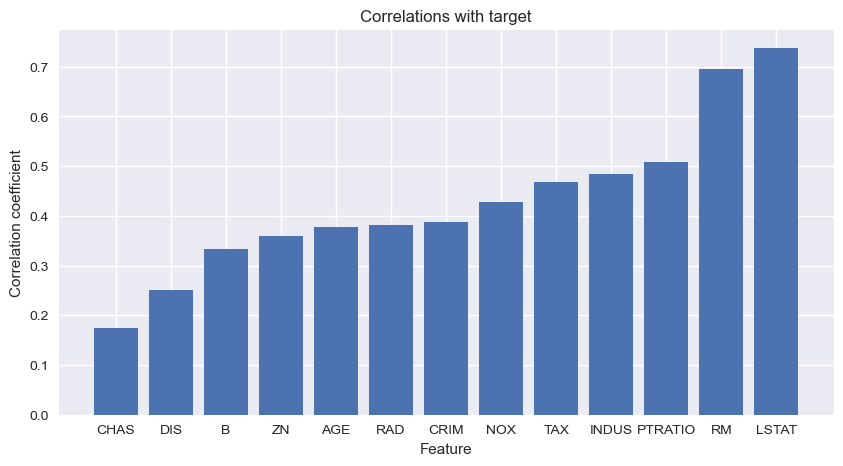

In [5]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Итак, самый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT). Давайте построим линейную регрессию, используя этот признак.

> Примечание. Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

Вспоминаем нашу формулу аналитического решения по методу наименьших квадратов:

$\bar{w} = (X^TX)^{-1}X^Ty=QX^Ty$

Что есть $X$ и $y$? Это матрица из примеров (матрица наблюдений) и вектор правильных ответов к ним соответственно. У нас матрица  $X$ — это таблица, состоящая из одного столбца (LSTAT), а $y$ — столбец с медианными ценами (MEDV):

In [6]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


> Примечание. Двойные квадратные скобки `boston_data[['LSTAT']]` позволяют выбрать признак из DataFrame, сохранив его в виде таблицы. Это важно, так как в формуле МНК $X$ — это матрица.

У нас есть все компоненты формулы, чтобы найти параметры модели. Давайте напишем функцию `linear_regression()`, в которой реализуем вычисления коэффициентов. Аргументами функции будут матрица наблюдений $X$ и вектор ответов $y$, а возвращать она будет вектор параметров $w$.

Матричные вычисления легче всего реализовать через библиотеку `numpy`.

Для начала вспомним, что для вычисления свободного члена $w_0$ необходимо добавить в таблицу столбец, полностью состоящий из единиц. Такой столбец можно создать с помощью знакомой нам функции [ones()](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) из библиотеки `numpy`, а присоединить его к таблице $X$ поможет функция [column_stack()](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html).

Матричное умножение в numpy реализуется с помощью оператора `@`. Транспонирование осуществляется через `.T`, а обратная матрица вычисляется с помощью функции `inv()` из модуля `linalg` (модуля для линейной алгебры).

In [7]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

Осталось только вызвать нашу функцию и передать в неё нашу таблицу примеров $X$ и столбец правильных ответов $y$. Вычислим вектор параметров и выведем его на экран:

In [8]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
# Vector w: [34.55384088 -0.95004935]
# w0: 34.55
# w1: -0.95

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


Итак, мы получили значения коэффициентов уравнения прямой. С точностью до сотых они равны:

$w_0 = 34.55$

$w_1 = -0.95$

А значит сама модель будет иметь вид:

$\hat{y} = 34.55 - 0.95x_1$

Самое приятное в модели линейной регрессии — то, что её коэффициенты можно проинтерпретировать. 

Коэффициент $w_0 = 34.55$ имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно 0. 

Коэффициент $w_1 = -0.95$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на 1 %, то медианная цена зданий на участке упадёт на 0.95 тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на 0.95 тысяч долларов.

Теперь, если в данных появится новый участок Бостона с известной долей низкостатусного населения, мы сможем предсказать значение медианной стоимости домов простой подстановкой значений в модель:

In [9]:
#Задаём процент низкостатусного населения
x_example = 5.18
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))


Predicted value: 29.63


Так как мы работаем с одним фактором, то можем построить визуализацию нашей модели.

Давайте напишем функцию `plot_regression_2d()`, у которой будет три обязательных аргумента (матрица наблюдений X, столбец правильных ответов y и столбец с предсказаниями модели y_pred) и два аргумента по умолчанию (xlabel — подпись оси абсцисс и ylabel — подпись оси ординат).

In [10]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

Сделаем предсказание для всех объектов из таблицы X, подставив её в модель линейной регрессии с найденными параметрами, и построим график:

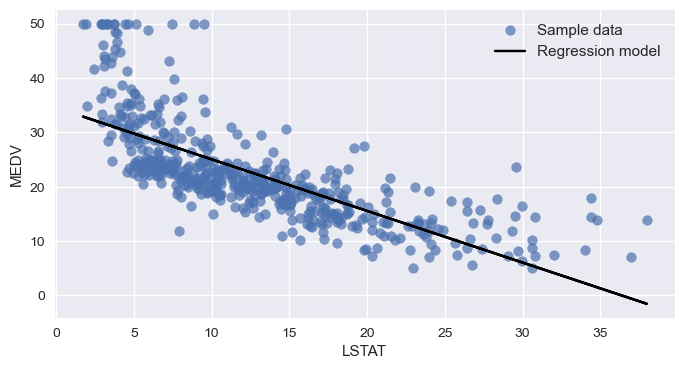

In [11]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Как и ожидалось, прямая является убывающей (коэффициент $w_1 < 0$), и, если её продолжить влево, она пересечётся с осью ординат в точке $w_0 = 34.55$. 

Итак, мы воспользовались формулой для МНК алгоритма и нашли параметры модели линейной регрессии «вручную», реализовав формулу в виде функции. Отметим, что наша функция универсальна: в неё можно подавать не только матрицу  с одним признаком (LSTAT), но и таблицу, содержащую все признаки, описывающие участки.

Конечно же, никто не строит линейную регрессию «руками», используя формулу МНК. Все дата-сайентисты пользуются библиотеками, такими как `sklearn`. Давайте посмотрим на реализацию


#### АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN

Алгоритм построения модели реализован в библиотеке машинного обучения `sklearn` и находится в модуле `linear_model`. Давайте импортируем этот модуль:

In [12]:
from sklearn import linear_model

В модуле находится класс [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), который реализует аналитическое решение линейной регрессии. Для обучения модели необходимо просто вызвать метод `fit()`, передав в него матрицу наблюдений `X` и вектор правильных ответов `y`.

Данный метод реализует формулу `метода наименьших квадратов` и рассчитает параметры модели самостоятельно. Чтобы получить свободный член $w_0$ нужно обратиться по атрибуту `intercept_`, а вектор параметров $w_1, w_2, ..., w_m$  будет храниться в атрибуте `coef_` (так как у нас один фактор в матрице `X`, то и коэффициент будет только один):

In [13]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)

print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

# w0: 34.55384087938311
# w1: [-0.95004935]

w0: 34.55384087938311
w1: [-0.95004935]


> Примечание. Обратите внимание, что мы получили ровно те же самые значения для параметров модели, что является вполне ожидаемым, ведь метод `fit()` у объекта `LinearRegression` реализует ту же самую формулу МНК, которую мы прописали в функции `linear_regression()`. Интерпретация коэффициентов остаётся той же.

Модель обучена. А как сделать предсказание? Вручную записывать выражение для модели и подставлять коэффициенты? Конечно же, нет. Для этого есть метод `predict()`. В него необходимо передать матрицу наблюдений, для которых нужно сделать предсказание.

Давайте сделаем предсказание для всех наших наблюдений из таблицы `X` и визуализируем результат с помощью нашей функции `plot_regression_2d()`:

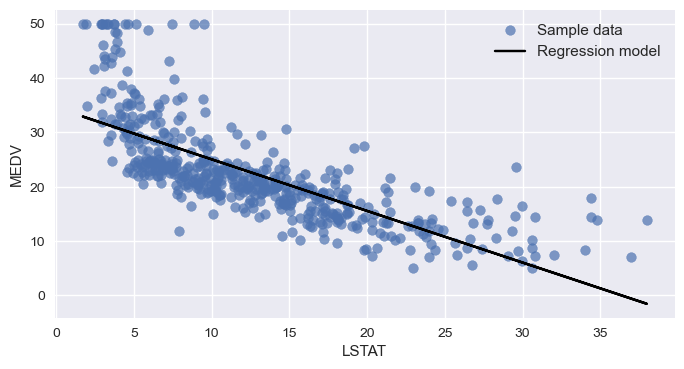

In [14]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Получаем тот же самый график, что мы видели ранее, когда реализовывали линейную регрессию вручную.

А что, если мы хотим построить линейную регрессию, используя всю предоставленную информацию, то есть все 13 признаков? Не проблема! Нужно только расширить матрицу наблюдений $X$, добавив в неё остальные признаки и снова обучить модель `LinearRegression`.

Давайте выберем из таблицы `boston` все столбцы, исключая столбец с целевой переменной (MEDV). Полученную матрицу `X` и вектор правильных ответов `y` отправляем в метод `fit()`, чтобы произвести подгонку и найти параметры модели.

In [15]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Для удобства составим `DataFrame` из коэффициентов $w_1, w_2, ..., w_m$  обученной модели, не забыв добавить к нему строку со свободным членом $w_0$:

In [16]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Итак, мы получили таблицу с признаками из нашего набора данных и коэффициентами, которые им соответствуют.

Каждый из коэффициентов в модели показывает, на сколько в среднем (согласно модели) изменится медианная цена (в тысячах долларов) при увеличении параметра на единицу. Например, если уровень преступности увеличится на один пункт, то медианная цена зданий на участке упадёт на 0.1 тыс. долларов. А вот увеличение среднего количества комнат на участке (RM) на одну единицу повысит медианную цену на 3.8 тыс. долларов.

> Свободный член (INTERCEPT) всё так же имитирует влияние внешних факторов и носит смысл «поправки» модели относительно медианной стоимости.

Итак, мы с вами построили две модели линейной регрессии: lr_lstat на одном признаке (LSTAT) и lr_full — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству. Может, нам достаточно только знаний о проценте низкостатусного населения, чтобы предсказать медианную цену?

Самая простая идея — визуализировать ошибки. Давайте построим коробчатые диаграммы ошибок моделей. Ошибки будем считать по формуле:
 $error_i = y_i - \hat{y}_i$

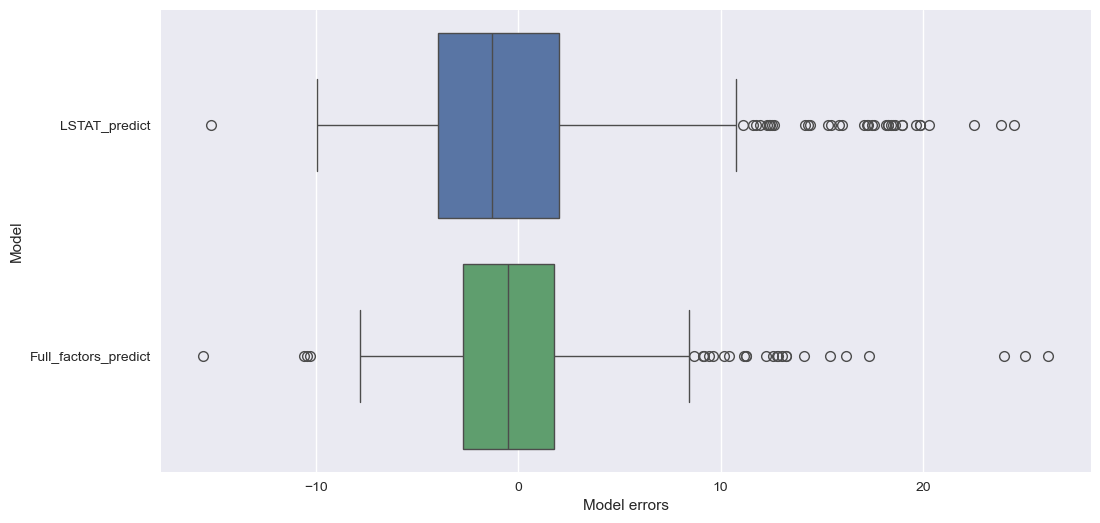

In [17]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat,
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к 0. То есть можно сказать, что визуально качество второй модели выглядит лучше.

На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.

Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. О том, как справиться с этой проблемой, мы поговорим чуть позже.

Визуализация — это, конечно, хорошо, но, согласитесь, не очень удобно: визуализация не даёт конкретики — только общие представления об ошибках.

Может быть, есть способ описать качество модели каким-то конкретным числом? Да. Этот показатель называется `метрикой`. 

✍ О метриках регрессии мы поговорим в следующем юните.

In [ ]:
from io import StringIO

data = pd.Series({
        'CRIM': 0.35114,
        'ZN': 0.00000,
        'INDUS': 7.38000,
        'CHAS': 0.00000,
        'NOX': 0.49300,
        'RM': 6.04100,
        'AGE': 49.90000,
        'DIS': 4.72110,
        'RAD': 5.00000,
        'TAX': 287.00000,
        'PTRATIO': 19.60000,
        'B': 396.90000,
        'LSTAT': 7.70000},
        name = 'new_sector')

df = pd.DataFrame(data).T
df.head()

new_pred = lr_full.predict(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
new_sector,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


Ранее мы с вами пришли к тому, что нам необходимо научиться оценивать качество модели с помощью какого-то показателя (или нескольких показателей). Такой показатель в машинном обучении называется метрикой. И для каждого класса задач машинного обучения существуют свои метрики.

> `Метрика` — это численное выражение качества моделирования.

Для оценки качества решения задачи регрессии существует множество метрик. Давайте рассмотрим самые основные и часто используемые.

#### МЕТРИКИ РЕГРЕССИИ

Будем рассматривать метрики для задачи регрессии на следующем примере. Возьмём первые пять наблюдений из нашей таблицы и предсказанные для них моделью `lr_lstat` ответы:

$y = (24.0, 21.6, 34.7, 33.4, 36.2)$

$\hat{y} = (29.82, 25.87, 30.73, 31.76, 29.49)$

На этих значениях мы будем рассматривать следующие метрики:

1.**Средняя абсолютная ошибка** — `MAE` (Mean Absolute Error)

Это самый простой и уже знакомый вам показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

$MAE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$

> Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.

$MAE = \frac{|24.0-29.82|+|21.6-25.87|+|34.7-25.87|+|33.4-31.76|+|36.2-29.49|}{5} = 4.482$ [тыс. $]

То есть для нашего примера из пяти наблюдений в среднем модель ошибается на 4.482 тысячи долларов.

Много ли это? Хороший вопрос, на который без эксперта-оценщика недвижимости будет сложно дать ответ. Однако можно попробовать посчитать ошибку в процентах, ведь в процентах всё воспринимается легче, и для этого нам пригодится следующая метрика — `MAPE`.

2. **Cредняя абсолютная ошибка в процентах** — `MAPE` (Mean Absolute Percent Error)

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.

$MAPE = \sum_{i=1}^{n}\frac{|y_i - \hat{y}_i|}{|y_i|}\frac{100\%}{n}$

> Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.

Например, средняя ошибка — 2 тысячи долларов. Это много или мало? Смотря для чего... А вот средняя ошибка, равная 80 % — это много или мало? Определённо много.

$MAPE = (\frac{|24.0-29.82|}{|24.0|}+\frac{|21.6-25.87|}{|21.6|}+\frac{|34.7-25.87|}{|34.7|}+\frac{|33.4-31.76|}{|33.4|}+\frac{|36.2-29.49|}{|36.2|}) \frac{100\%}{5} = 15.781\%$

Таким образом, на первых пяти наблюдениях модель в среднем ошибается на 15.781 %. Это довольно неплохой результат.

3. **Средняя квадратическая ошибка** — `MSE`

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики.

Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$

Данная метрика хуже поддаётся интерпретации, чем предыдущая, так как измеряется не в единицах, а в квадратах единиц. Она чаще используется для внутреннего обсуждения между дата-сайентистами, заказчику такая метрика может быть непонятна.

$MSE = \frac{(24.0-29.82^2+(21.6-25.87)^2+(34.7-25.87)^2+(33.4-31.76)^2+(36.2-29.49)^2}{5} = 22.116$ $[(тыс. \$)^2]$

Таким образом, для нашего примера квадрат отклонения составляет 22.116 тысяч долларов в квадрате.

Согласитесь, не очень понятно, о чём идет речь. Однако данная метрика является популярной, так как позволяет «штрафовать» модель за очень большие ошибки.

#### Что значит «штрафовать»? 

Например, расхождение в 200 единиц в метрике `MSE` воспринимается как $200^2$, а в метрике `MAE` это расхождение воспринимается как 200. Поэтому, если у нас есть две модели, но одна из них допускает большие ошибки, эти ошибки становятся ещё больше при расчёте метрики `MSE`, и нам легче сравнить модели между собой.

> Но в то же время это и проклятие `MSE`. Если в данных присутствуют выбросы, метрика может быть необъективной. Если модель будет утверждать, что цена здания — 30 тысяч долларов, а в наборе данных ему соответствует цена в 3 миллиона долларов, то при возведении такой ошибки в квадрат получится 9 миллионов, что может сбить с толку исследователя. Необходимо скептически относиться к данной метрике, если вы не проводили исследование данных на предмет наличия выбросов.

4. **Корень из средней квадратической ошибки** — `RMSE` (Root Mean Squared Error)

Для получения `RMSE` надо просто извлечь квадратный корень из `MSE`:

$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}$

Корень извлекается для того, чтобы привести размерности ответов и ошибок в соответствие и сделать метрику более понятной.

$RMSE = \sqrt{22.116}=4.702 [тыс. \$]$

Преимущества и недостатки этой метрики такие же, как и у `MSE`, к преимуществам добавляется только понятная размерность.

5. **Коэффициент детерминации** $(R^2)$

Все рассматриваемые ранее метрики имели масштаб от 0 до $\infty$. Чем это плохо?

А что если нам скажут, что `MSE` для модели составляет 32? Должны ли мы улучшить модель, или она достаточно хороша? А что если `MSE = 0.4`?

На самом деле, трудно понять, хороша модель или нет, не сравнив её показатели с теми же показателями других моделей.

Коэффициент детерминации, или $R^2$, является ещё одним показателем, который мы можем использовать для оценки модели. Он тесно связан с `MSE`, но его преимущество в том, что $R^2$ всегда находится в промежутке между $-\infty$ и 1.

$R^2 = 1 - \frac{MSE}{MSE_\text{mean}}$, 

где $MSE_\text{mean} = \frac{\sum_{i=1}^{n}(y_i - \bar{y}_i)^2}{n}$

где $\bar{y}$ — среднее по вектору правильных ответов.

То есть $R^2$ показывает, насколько наша модель лучше, чем если бы все предсказания были средним по правильным ответам.

Посмотрим, как считается $R^2$. Сначала рассчитаем среднее по правильным ответам:

$\bar{y} = \frac{24.0+21.6+34.7+33.4+36.2}{5} = 29.98$

теперь рассчитаем $MSE_\text{mean}$:

$MSE_\text{mean} = \frac{(24.0-29.98)^2 + (21.6-29.98)^2 + (34.7-29.98)^2 + (33.4-29.98)^2 + (36.2-29.98)^2}{5} = 35.72$

И, наконец, сам $R^2$:  $R^2 = 1 - \frac{22.116}{35.72} = 0.38$

Есть ещё одна интерпретация данной метрики. Статистически показатель $R^2$ описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

`Удовлетворительным` $R^2$ считается показатель `выше 0.5`: `чем ближе к 1, тем лучше`. Отрицательные значения  говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.

Давайте обобщим всё вышесказанное в виде таблицы:

|Название|Формула|Интерпретация и применение|Достоинства|Недостатки|Функция в модуле metrics библиотеки sklearn|
|--------|-------|--------------------------|-----------|----------|-------------------------------------------|
|MAE|$\frac{\sum_{i=1}^{n}\|y_i - \hat{y}_i\|}{n}$|Помогает оценить абсолютную ошибку: насколько в среднем число в предсказании разошлось с реальным числом.|Удобно интерпретировать. Измеряется в тех же единицах, что и целевой признак. Несильно искажается при наличии выбросов.|Не поможет, если необходимо сравнить модели, предсказывающие одно и то же по разным признакам.|`mean_absolute_error()`|
|MAPE|$\sum_{i=1}^{n}\frac{\|y_i - \hat{y}_i\|}{\|y_i\|}\frac{100\%}{n}$|Помогает абстрагироваться от конкретных чисел и оценить абсолютную ошибку в процентах.|Легко интерпретировать. Используется в задачах, где неизвестно, какое значение метрики считать приемлемым.|Плохо подходит для задач, в которых важны конкретные единицы измерений. Лучше использовать в паре с MAE, чтобы знать абсолютную ошибку и её значение в процентах.|`mean_absolute_percentage_error()`|
|MSE|$\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$|Интерпретации нет. Используется в задачах, где критически важны большие ошибки, например при предсказании координат полёта.|Каждая ошибка вносит свой квадратичный штраф, большие расхождения между предсказанием и истиной увеличивают штраф.|Измеряется в квадратах единиц, поэтому менее доступна для понимания. Искажается при наличии выбросов. Не поможет, если нужно сравнить модели, предсказывающие одно и то же по разным признакам.|`mean_squared_error()`|
|RMSE|$\sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}$|Можно трактовать как стандартное отклонение предсказаний от истинных ответов. Используется в тех же задачах, что и MSE.|Имеет те же преимущества, что и MSE, но более удобна для понимания (измеряется в тех же единицах, что и целевая переменная).|Не поможет, если нужно сравнить модели, предсказывающие одно и то же по разным признакам.|Отдельная функция отсутствует, но можно извлечь корень из результата функции `mean_squared_error()`.|
|$R^2$|$1 - \frac{MSE}{MSE_\text{mean}}$|Помогает понять, какую долю разнообразия (дисперсии) смогла уловить модель в данных. Позволяет сравнить, насколько модель лучше, чем простое предсказание средним.|Можно сравнивать модели, обученные на разных признаках. Легко оценить качество модели: измеряется от $-\infty$ до 1. Удовлетворительным показателем считается показатель выше 0.5.|Чувствительна к добавлению новых данных. Чувствительна к выбросам, так как основана на MSE.|`r2_score()`|

### РАСЧЁТ МЕТРИК НА PYTHON

Настало время проверить качество построенных нами ранее моделей линейной регрессии: `lr_lstat` и `lr_full`.

Весь набор функций для вычисления метрик в `sklearn` находится в модуле `metrics`. Давайте его импортируем:

In [1]:
from sklearn import metrics

Функции, которые нам понадобятся:

- `mean_absolute_error()` — расчёт MAE;
- `mean_squared_error()` — расчёт MSE;
- `mean_absolute_percentage_error()` — расчёт MAPE;
- `r2_score()` — расчёт коэффициента детерминации $R^2$.

В каждую из функций достаточно передать правильные ответы и предсказания, и функция вернёт рассчитанную метрику.

> Примечание. Для расчёта метрики `RMSE` нет специальной функции, однако мы знаем, что для её расчёта достаточно извлечь квадратный корень из `MSE`.

Из-за особенностей реализации функция `mean_absolute_percentage_error()` возвращает результат не в процентах, а в долях. Чтобы отобразить результат в процентах, необходимо умножить его на 100.

Давайте вычислим метрики и выведем их на экран, округлив до третьего знака после запятой. Начнём с модели `lr_lstat`: сделаем предсказание на основании признака `LSTAT` и передадим истинные и предсказанные медианные цены в функции для расчёта метрик:

In [ ]:
#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))


# MAE score: 4.505 thou. $
# RMSE score: 6.203 thou. $
# MAPE score: 21.352 %
# R2 score: 0.544

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


Проделываем ту же самую операцию для второй модели линейной регрессии, `lr_full`:

In [ ]:
#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))


# MAE score: 3.271 thou. $
# RMSE score: 4.679 thou. $
# MAPE score: 16.417 %
# R2 score: 0.741

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


Сравним полученные результаты:

: $MAE$ в среднем первая модель ошибается на  4.505 тыс. долларов, а вторая — на 3.271 тыс. долларов.
: $RMSE$ среднеквадратичное отклонение первой модели от истинных ответов составляет 6.203 тыс. долларов, а второй — 4.679.
: $MAPE$ первая модель ошибается на 21.352 %, а вторая — на 16.417 %.
: $R^2$ доля объясняемой информации (дисперсии), которую улавливает первая модель, — 0.544, а вторая — 0.741.

Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

> Следует отметить, что для задач регрессии существует множество метрик, и мы рассмотрели только наиболее распространённые из них. Весь список метрик и их расчёт в sklearn вы можете найти [здесь](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/#regression-metrics).

In [ ]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

print('RMSE score: {:.2f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))


RMSE score: 5.75 thou. $


In [22]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

print('R2 score: {:.2f}'.format(metrics.r2_score(y_true, y_pred)))

R2 score: 0.71


#### НЕДОСТАТКИ АНАЛИТИЧЕСКОГО РЕШЕНИЯ

Ранее мы с вами рассмотрели, что такое модель линейной регрессии, и научились рассчитывать её параметры с помощью аналитического подхода — метода наименьших квадратов.

$\bar{w} = (X^TX)^{-1}X^Ty=QX^Ty$

Метод наименьших квадратов позволяет очень просто получить коэффициенты , подставив таблицу в формулу. Вот, собственно, и всё «обучение». 

> Существует теорема [Гаусса-Маркова](https://ru.wikipedia.org/wiki/Теорема_Гаусса_—_Маркова), которая говорит о том, что, если выполнены все условия теоремы, МНК всегда находит оптимальные оценки параметров. Мы ещё вернемся к этой теореме, когда будем говорить об МНК в модулях по линейной алгебре.

Казалось бы, относительно простая математика: надо всего лишь перемножить матрицы между собой и получить ответ. Особенно простой эта задача должна быть для компьютера. Но нам так кажется, поскольку мы ранее не сталкивались с матричным умножением и будем говорить о нём только в модулях по линейной алгебре.

> Оказывается, у такого простого подхода есть один большой минус — это работа с большим количеством признаков.

Давайте внимательно посмотрим на операцию обращения матриц (возведение в степень -1):

$Q=(X^TX)^{-1}$ 

Таблица $X$ имеет размер $(n,m)$, то есть у неё $n$ строк и $m$ столбцов. Таблица $X^T$ — это результат транспонирования матриц (замены строк и столбцов местами), то есть её размерность — $(m, n)$. Забегая вперёд, отметим, что по правилам умножения матриц результат умножения будет иметь размерность $(m,n) \times (n,m) = (m,m)$, где $m$ — это число столбцов.

А теперь представим, что у нас не 13 признаков, а 1300. То есть матрица $Q$ имеет размерность $(m,m) = (1300, 1300)$. Но мы делаем вычисления на компьютере, так ведь? Сложностей быть не должно, но... В модулях по линейной алгебре мы увидим, что обращение матриц — очень ресурсозатратная операция. У неё кубическая сложность, то есть если размер матрицы — $(m, m)$, то на её обращение понадобится $m^3$ операций. Для нашего примера это $1300^3 = 2197000000$!

Обращение матриц больших размеров может стать очень трудоёмким процессом при работе с большими объёмами данных.

> Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.

###### Что это такое?

Представьте, что мы построили модель, но собираемся её уточнять в процессе эксплуатации. К нам приходят всё новые данные, и мы должны изменять параметры модели, подстраиваясь под новые зависимости.

Если мы используем метод `fit()` для модели `LinearRegression` и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты. То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.

Первая и вторая проблемы решаются с помощью замены аналитического МНК на численные методы, такие как градиентный спуск.

Третий недостаток МНК больше теоретический и заключается в том, что матрица  в результате вычислений может не существовать. Это связано с математическими особенностями вычисления обратной матрицы, которые мы рассмотрим далее в курсе. 

Причина этой проблемы — мультиколлинеарность факторов (сильная корреляционная связь). Из-за этого коэффициенты линейной регрессии становятся слишком большими и модель становится неустойчивой. 

Проблема решается с помощью регуляризации.

### Линейная регресси: численной решение

Ранее мы с вами установили, что `аналитическое решение линейной регрессии` — метод наименьших квадратов — имеет несколько недостатков. Основной из них — большая вычислительная сложность обращения матриц.

Хотелось бы получить метод, который справляется с этим недостатком. Для этого давайте вернёмся на шаг назад и вспомним, как вообще звучит постановка задачи поиска параметров модели.

В самом простом двумерном случае мы пытаемся найти такие коэффициенты  уравнения прямой $w_0$ и $w_1$, чтобы средний квадрат ошибки ($MSE$) был минимален.

$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)}{n} = \frac{\sum_{i=1}^{n}(y_i - w_0 - w_1x_i)^2}{n} \rightarrow \min_{w}$

Гауссу удалось найти общее решение для этой оптимизационной задачи и вывести формулу метода наименьших квадратов для поиска коэффициентов.

Но можно пойти другим путём, не аналитическим (вывод формулы «в лоб»), а численным (итерационное приближение функции к минимуму).

Самым популярным численным методом оптимизации, используемым в машинном обучении, является **алгоритм градиентного спуска.**

> `Градиентный спуск (Gradient descent)` — самый используемый алгоритм минимизации функции потерь. Он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов численной оптимизации.

С градиентным спуском мы будем детально знакомиться в модулях по оптимизации и даже реализуем его своими руками. Сейчас же нам важно усвоить принцип работы, чтобы понимать, какими параметрами алгоритма мы можем управлять при его использовании в коде.

Начнём обзор алгоритма немного издалека.

Представим, что мы находимся на некоторой холмистой местности и нам надо добраться до самой низкой точки, но делаем мы это вслепую, то есть не знаем сам ландшафт. Назовём эту точку целью.

<img src='img/dst3-ml1-4_1.jpg'>

Давайте опишем, как мы будем искать эту точку. Для начала необходимо задать начальную точку, из которой мы, собственно, стартуем. Далее мы двигаемся в сторону крутизны склона. Если склон круче справа, надо сделать шаг вправо, если склон круче слева, надо сделать шаг влево. Повторяем шаги до тех пор, пока не достигнем самой низкой точки.

У вас мог возникнуть вопрос: как определить, что мы достигли цели — самой низкой точки? В этой точке крутизна склона с обеих сторон равна 0 или близка к нему (ровная поверхность). Можно использовать эту информацию как точку остановки нашего алгоритма.

Описанный нами алгоритм можно перевести на язык математики. Он то и будет называться алгоритмом градиентного спуска.

Наша функция потерь, которая зависит от параметров модели, — это аналогия ландшафта местности. Пространство, в котором находится ландшафт, — это пространство параметров  нашей модели. То есть это система координат, в которой по осям отложены все возможные значения параметров.

В двумерном случае, когда есть только один параметр, от которого зависит функция потерь, можно построить график функции потерь. Например, для $MSE$, зависящей от одного параметра, график будет иметь вид параболы:

<img src='img/dst3-ml1-4_2.jpg'>

Если параметров не один, а два, то функция потерь будет графически представлена в виде поверхности в трёхмерном пространстве. Ниже приведён пример такой поверхности и её вид сверху в виде концентрических кругов:

> В общем случае, когда у нас больше параметров модели, мы будем работать в многомерном пространстве. Но в этом нет ничего страшного. Суть поиска минимума от этого не меняется, меняется только сложность функции — структуры ландшафта.

Для линейной регрессии необходимо найти в этом пространстве такие координаты $w_0$, $w_1$, $w_2$, ... , $w_m$ в которых находится минимум функции потерь.

Как же нам понять, в какую сторону двигаться? Что будет отвечать за направление крутизны склона? На этот вопрос нам ответит математический анализ. В теории анализа функций, зависящих от нескольких переменных, существует понятие [градиента](https://ru.wikipedia.org/wiki/Градиент).

> Математически градиент — это вектор, который состоит из частных производных по параметрам функции.

Он записывается следующим образом:

$\nabla L(w) = \left( \frac{\partial L(w)}{\partial w_0}, \frac{\partial L(w)}{\partial w_1}, \frac{\partial L(w)}{\partial w_2}, ..., \frac{\partial L(w)}{\partial w_m} \right)$


где $L(w)$ — функция потерь, зависящая от параметров модели, функция может быть любой (например, `MSE`). $\nabla$ — символ набла — символьное сокращение градиента, читается как «градиент функции $ L(w)$». 

Пусть пока что математическая формализация градиента нам непонятна, но нам важно отметить его ключевую особенность.

> Градиент — это вектор, который показывает направление наискорейшего роста функции, а его длина — это само значение скорости функции в точке.

Если вновь обратиться к примеру с холмами, градиент показывает, с какой скоростью и в каком направлении нужно двигаться из текущей точки, чтобы достичь более высшей точки.

> А теперь время фокусов. Если поставить перед градиентом знак минус $- \nabla L(w)$, то мы получим вектор `антиградиента`, который показывает в сторону `наискорейшего убывания функции потерь`!

В случае одного параметра:

<img src='img/dst3-ml1-4_4.jpg'>

В случае двух параметров:

<img src='img/dst3-ml1-4_5.jpg'>


А это и есть то, что нам нужно. С помощью этого знания мы сможем вычислять следующую координату в пространстве — следующую точку, которую нам нужно посетить, чтобы дойти до цели — минимума функции.

Формально это записывается следующим образом (формулу запоминать не нужно):

$w^{(k+1)} = w^{(k)} - \eta \nabla L(w^{(k)})$

где $w$ — это вектор параметров модели, координаты в пространстве, а индекс в круглых скобках сверху означает номер точки в пространстве. Запись $\nabla L(w^{(k)})$ означает, что градиент вычисляется в текущей точке под номером $k$.

Согласно приведённой формуле, новая координата $w^{(k+1)}$ в пространстве параметров определяется как текущая координата $w^{(k)}$ минус скорость роста в текущей точке $\nabla L(w^{(k)})$, помноженная на коэффициент "скольжения" 

Отдельное внимание стоит уделить коэффициенту $\eta$ (читается как «эта»). Это поправочный коэффициент, который носит название `темп обучения` (learning rate).

> `Темп обучения` — это основной параметр алгоритма. Он определяет то, насколько сильно мы будем двигать точку. В аналогии с нашим примером с движением по холмам можно сказать, что это коэффициент, обратный сопротивлению ландшафта, по которому мы движемся.

Управляя данным параметром (уменьшая и увеличивая его), мы управляем скоростью движения к точке минимума. Чем больше темп обучения, тем длиннее наши шаги и тем быстрее мы движемся, и наоборот. О том, зачем этот параметр нужен и как выбирать значение $\eta$, мы поговорим чуть позже.

> Примечание. Темп обучения является примером внешнего параметра алгоритма, которым может управлять пользователь. Такие параметры ещё называют **гиперпараметрами**.

Есть ещё одно важное свойство градиента: теоретически в точке минимума длина вектора равна 0, то есть движения не происходит. Это свойство мы можем использовать в качестве критерия остановки нашего алгоритма.

<img src='img/dst3-ml1-4_6.jpg'>

Теперь у нас есть все компоненты, чтобы составить алгоритм для обучения модели линейной регрессии методом градиентного спуска. Для простоты возьмём случай, когда мы строим регрессию на основе только одного признака.

Для начала вспомним, как выглядит вид модели линейной регрессии, когда у нас есть только один фактор:

$\hat{y} = w_0 + w_1x$

У нас есть набор значений фактора $x = (x_1, x_2, ..., x_n)$ и столбец с правильными ответами $y = (y_1, y_1, ..., y_n)$. Мы пытаемся найти такие коэффициенты прямой, чтобы ошибка предсказания была минимальной. 

Алгоритм градиентного спуска для такой модели будет выглядеть следующим образом: 

1. `Проинициализировать значения параметров $w_, w_1$`

На аналогии наших холмов это будет означать выбор начальной точки в пространстве, из которой мы будем двигаться.

Правильная инициализация параметров — это отдельная история. Например, можно инициализировать все параметры нулями или случайными значениями.

2. `Повторять до тех пор, пока длина градиента не приблизится к 0`

На практике полного равенства градиента нулю достичь невозможно из-за численных вычислений, поэтому в качестве остановки задают минимальную границу, ниже которой длина градиента считается достаточной, чтобы остановиться (например, 0.1, 0.01 или 0.001). Если длина будет меньше заданной, то алгоритм можно останавливать.

Существуют и другие критерии остановки: например, остановиться, если текущее значение функции потерь < 1.5. Но они используются гораздо реже.

2.1. Вычислить градиент функции потерь $\nabla L(w)$

Это будет означать нахождение направления и вектора скорости роста нашего ландшафта. 

Грубо говоря, нужно взять вектор-столбец с примерами $x_i$ и подставить его в формулу для вычисления градиента функции потерь. Формулы вычисления градиента для наиболее часто используемых функций потерь уже вычислены и заложены в библиотечные реализации.

Далее приведены формулы вычисления градиента для MSE для двух параметров.

<img src='img/dst3-ml1-4_7.jpg'>

2.2. Обновить параметры модели, сдвинув их в сторону антиградиента

Из текущей точки необходимо перейти в новую точку, в сторону убывания высоты ландшафта.

Для обновления координат точки используем формулу:

$w^{(k+1)} = w^{(k)} - \eta \nabla L(w^{(k)})$

Далее приведены формулы вычисления градиента для MSE для двух параметров.

<img src='img/dst3-ml1-4_8.jpg'>

Индекс в круглых скобках сверху означает номер итерации

Анимация работы градиентного спуска для двух параметров:

<video src='img/dst3-ml1-4_9.mp4' controls> </video>

А как будет меняться само уравнение прямой при минимизации функции ошибок? Коэффициенты прямой будут адаптироваться под зависимость в данных и приближаться к оптимальным значениям. В анимации это будет выглядеть следующим образом:

<video src='img/dst3-ml1-4_10.mp4' controls></video>

> Примечание. На анимации `Error` обозначена функция ошибки `MSE`. С помощью $m$ и $b$ обозначены параметры $w_0$ и $w_1$ соответственно.

###### Давайте подведём промежуточный итог.

`Градиентный спуск` — простой и мощный алгоритм оптимизации, который позволяет итеративно находить минимум функции потерь и тем самым находить оптимальные параметры модели.

Причём функция потерь не обязательно должна быть `MSE`. Главное требование к функции потерь — это её гладкость во всех точках.

> Примечание. С математической точки зрения гладкими называются функции, которые имеют производную во всех точках.

Для нашего пока что обывательского понимания это значит, что функция должна иметь плавный переход из точки в точку. Примеры:

<img src='img/dst3-ml1-4_11.jpg'>

> Благодаря своей простоте алгоритм обладает минимальной вычислительной сложностью и работает быстрее, чем метод наименьших квадратов, даже на огромных наборах данных с тысячами признаков.

Однако у градиентного спуска есть одна большая проблема — это сходимость алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.

Сходимость зависит от многих факторов, главные из которых:

- сложности зависимости и сложности функции потерь;
- выбранный темп обучения;
- выбранная начальная точка (инициализация параметров);
- масштабирование признаков.

Из-за сложной зависимости и сложности самой функции потерь она может иметь несколько видов минимумов: локальные и глобальные.

> `Локальный минимум` — это минимум на какой-то локальной области. 

> `Глобальный минимум` — это минимум на всей области определения функции (на всём ландшафте).

Например, ваши минимальные расходы в онлайн-банке за весь период пользования приложением — это глобальный минимум. А минимальные расходы в приложении за последние шесть месяцев — это локальный минимум. Эти значения могут существенно отличаться.

 Когда мы говорим о функции потерь, нас интересует именно глобальный минимум, то есть тот минимум, которого вообще возможно достичь при управлении параметрами.

 Функция потерь с локальным и глобальным минимумом в случае одного параметра:

 <img src='img/dst3-ml1-4_12.jpg'>

 Функция потерь с локальным и глобальным минимумом в случае двух параметров:

 <img src='img/dst3-ml1-4_13.jpg'>

 Проблема градиентного спуска заключается в том, что алгоритм может «застрять» в локальном минимуме и не выйти из него.

Застряв в локальном минимуме, мы не найдем настоящие оптимальные значения параметров.

Чтобы частично решить эту проблему используется не классический градиентный спуск, а его [модификации](https://habr.com/ru/post/413853/). Существует множество модификаций градиентного спуска, и мы будем знакомиться с большей их частью далее в курсе.

В этом модуле мы будем использовать `стохастический градиентный спуск` (Stochastic Gradient Descent, SGD). 

В классическом алгоритме мы используем всю выборку и прогоняем её несколько раз через алгоритм, вычисляя градиент функции ошибки, плавно приближаясь к минимуму.

> Стохастическая модификация предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части.

То есть мы случайно выбираем несколько строк из таблицы и подставляем их в алгоритм, делаем шаг в сторону минимума и повторяем это множество раз, пока алгоритм не сойдётся к приемлемому значению или пока не закончатся итерации (в реализации всегда задаётся максимум итераций на случай, если алгоритм не сойдётся и будет «блуждать по холмам» вечно).

> Благодаря этому вектор градиента всё время колеблется, и мы прыгаем из точки в точку, а не идём вдоль ровной линии, как это было в классическом градиентом спуске.

На рисунке ниже приведены графики «блуждания» точки в пространстве функции потерь (вид сверху).

<img src='img/dst3-ml1-4_14.jpg'>

##### В чём выгода?

Благодаря таким случайным колебаниям у нас появляется больше возможностей «выкарабкаться» из локальных минимумов и дойти до глобального минимума.

> Однако из-за таких скачков есть шанс пропустить и глобальный минимум функции потерь, если скачки будут слишком большими.

Чтобы управлять шагами, как раз и существует параметр темпа обучения. Он позволяет управлять размером шага градиентного спуска.

> Даже для обычной выпуклой функции, такой как парабола, градиентный спуск может сходиться медленно, если выбран слишком маленький темп обучения, или не сходиться вообще, если темп слишком большой. Поэтому темп обучения — это один из самых важных внешних параметров, на который мы можем повлиять.

<img src='img/dst3-ml1-4_15.jpg'>

Наиболее распространённые значения $\eta < 1$:  0.01, 0.001 и т. д.

Но есть идея получше! Будем брать большой шаг в начале обучения и уменьшать его постепенно, приближаясь к минимуму, чтобы не «выпрыгнуть» из точки минимума.

В реализации стохастического градиентного спуска в `sklearn`, с которым мы будем работать, именно такая идея и используется по умолчанию. Параметр  регулируется в процессе обучения — он уменьшается с ростом числа итераций по формуле:

$\eta_t = \frac{\eta_0}{t^p}$

где $\eta_0$ — начальное значение темпа обучения, $p$ — мощность уменьшения темпа (задаётся пользователем).

Ещё один важный момент, на который стоит обратить внимание при работе с градиентным спуском — это **обязательное масштабирование факторов** (приведение факторов к единому масштабу или к единым статистическим характеристикам), если их несколько.

> Например, в нашем наборе данных о домах в Бостоне есть признак NOX (концентрация оксидов азота): он изменяется в диапазоне от 0 до 1. Также есть признак LSTAT (процент низкостатусного населения), который изменяется в диапазоне от 0 до 100 %. 

Для градиентного спуска (особенно стохастического) важно, чтобы все факторы были приведены к единому масштабу с помощью нормализации/стандартизации (мы изучали их в модуле [EDA-3. «Проектирование признаков»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/b6921d3b5c654a33a5927d61304a8d07)). Иначе в пространстве параметров функция ошибки становится очень растянутой по одной оси, но очень сжатой по другой, и найти её минимум будет очень сложно.

На самом деле про градиентный спуск и особенности каждой из его модификаций можно говорить очень долго. Мы с вами разобрались в основных принципах работы этого метода оптимизации для поиска параметров линейной регрессии и обсудили самое главное, на что стоит обратить внимание. А теперь — время практики на Python 

#### ЧИСЛЕННОЕ РЕШЕНИЕ НА PYTHON

Как и раньше, будем работать с датасетом о домах в Бостоне.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Обучим с помощью градиентного спуска линейную регрессию на одном факторе — LSTAT (процент низкостатусного населения) — и сравним результат с полученным ранее результатом МНК.

In [2]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов

Будем использовать реализацию стохастического градиентного спуска для линейной регрессии из библиотеки `sklearn` — [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Она находится в том же модуле `linear_model`.

У класса `SGDRegressor` есть множество параметров. Например, параметр `random_state` отвечает за число, на основе которого происходит генерация  случайных чисел. Напомним, в `SGD` случайность присутствует в инициализации параметров и выборе части из набора данных. Установив значение параметра `random_state` равным определённому числу, мы можем гарантировать одинаковые результаты работы метода при разных запусках. Пусть это будет число `42`.

Для обучения используется метод `fit()`: он запускает работу `градиентного спуска` для поиска параметров, в него необходимо передать `данные` и `правильные ответы`.

Примечание. К сожалению, в `sklearn` нельзя посмотреть то, как происходит поиск оптимальных параметров с помощью `SGD`. Поэтому нет возможности продемонстрировать историю изменения функции потерь. В модулях по оптимизации мы самостоятельно реализуем алгоритм и посмотрим на поэтапную минимизацию.

In [3]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


Обучение завершено, параметры найдены. Давайте выведем их на экран. Для этого используются уже знакомые вам атрибуты `coef_` и `intercept_`:

In [4]:
print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

# w0: [34.33010969]
# w1: [-0.96193242]

w0: [34.33010969]
w1: [-0.96193242]


Примечание. Обратите внимание, что значения параметров немного отличаются от полученных ранее с помощью МНК значений. Для МНК коэффициенты были равны:

```PYTHOH
# w0: [34.55384087938311]
# w1: [-0.95004935]
```

В этом нет ничего удивительного, ведь МНК — это аналитический метод, он выдаёт точное решение, а SGD — численный, и вычисления останавливаются, когда достигается приемлемая точность.

Давайте с помощью метода `predict()` сделаем предсказание цены для всех объектов из нашей выборки и построим визуализацию:

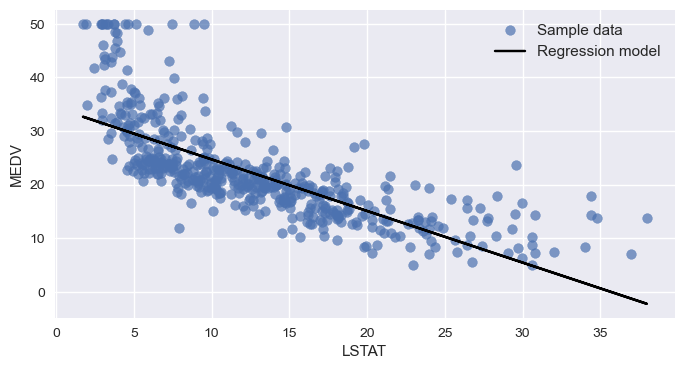

In [5]:
#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Можно рассчитать метрики регрессии для полученной модели. Давайте для примера посчитаем $R^2$:

In [6]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))
# R2 score: 0.542

R2 score: 0.542


Итоговый $R^2$ для линейной регрессии, обученной с помощью градиентного спуска, составил `0.542`. Напомним, для той же модели, обученной с помощью `МНК`, метрика была равна `0.544`. То есть доля информации, которую объяснила модель, обученная с помощью градиентного спуска, ниже примерно на `0.002`. Очевидно, в реальных задачах такая разница не имеет значения. 

Теперь попробуем обучить многомерную линейную регрессию с помощью `SGD`. Как и раньше составим полную матрицу наблюдений $X$ из всех факторов, которые нам даны. Обучим модель и выведем значения коэффициентов в виде DataFrame:

In [ ]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-2.882621e+11
1,ZN,1.463415e+11
2,INDUS,-4.562202e+11
3,CHAS,2.200288e+10
4,NOX,5.863282e+09
5,RM,-1.312603e+11
6,AGE,2.289126e+11
7,DIS,-3.737552e+11
8,RAD,-3.721644e+10
9,TAX,1.431411e+11


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

Давайте сделаем предсказание и выведем $R^2$ для обученной модели:

In [8]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

# R2 score: -10590303862129977211224064.000

R2 score: -73422832852111229747986432.000


$R^2$ отрицательный. Да ещё какой! Напомним, отрицательный $R^2$ говорит о том, что модель абсолютно не описывает зависимости в данных.

В чём же причина? Неужели `SGD` не справился с поиском `14 параметров` (свободный член + 13 коэффициентов при факторах)?

Ответ очень простой — `отсутствие масштабирования`. Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций `очень важно масштабировать данные` с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

Давайте `стандартизируем наши данные`. Воспользуемся классом `StandardScaler` из модуля `preprocessing` библиотеки `sklearn`, который реализует стандартизацию.

In [ ]:
from sklearn import preprocessing

#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


Попытка №2. Обучим модель и составим таблицу из её параметров:

In [ ]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


Вот теперь результат более схож с реальностью. Сделаем предсказание и посчитаем результирующий $R^2$:

In [11]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

# R2 score: 0.740

R2 score: 0.740


Теперь метрика имеет приемлемое значение, а значит градиентный спуск смог сойтись.

> Важно! Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.

Например, если попытаться сделать предсказание с помощью построенной модели, передав в качестве матрицы наблюдений нестандартизованную таблицу, то ошибки мы не получим, однако значение метрики будет неадекватным:

In [12]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём нестандартизованные данные
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

# R2 score: -1856.503

R2 score: -1856.503


У класса `SGDRegressor`, помимо `random_state`, есть ещё множество различных внешних параметров, которые можно настраивать. Со всем списком вы можете ознакомиться в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). А мы приведём несколько самых важных:

- `loss` — функция потерь. По умолчанию используется `squared_loss` — уже привычная нам `MSE`. Но могут использоваться и несколько других. Например, значение `"huber"` определяет функцию потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE.

- `max_iter` — максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — `1000`.

- `learning_rate` — режим управления темпом обучения. Значение по умолчанию — `'invscaling'`. Этот режим уменьшает темп обучения по формуле, которую мы рассматривали ранее: $\eta_t = \frac{\eta_0}{t^p}$.

Есть ещё несколько режимов управления, о которых вы можете прочитать в документации.

Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на `"constant"`.

- `eta0` — начальное значение темпа обучения . Значение по умолчанию — 0.01.

Если параметр `learning_rate="constant"`, то значение этого параметра будет темпом обучения на протяжении всех итераций.

- `power_t` — значение мощности уменьшения $p$ в формуле $\eta_t = \frac{\eta_0}{t^p}$, где $\eta_0$ — начальное значение темпа обучения, а $t$ — номер итерации алгоритма. То есть данный параметр отвечает за степень знаменателя (чем больше степень, тем быстрее уменьшается значение темпа обучения с каждой итерацией). Значение по умолчанию — `0.25`.

Давайте посмотрим, что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:

In [13]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

#R2 score: -335415038359.635

R2 score: -335415038359.635


$R^2 < 0$, то есть `SGD` разошёлся из-за слишком высокого темпа обучения. 

Вот ещё один плохой пример. Что будет, если поставить слишком маленькое значение параметра `eta0`? Например, 0.000001.

In [ ]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

# R2 score: -1.578
# warnings.warn("Maximum number of iteration reached before ")

R2 score: -1.578


c:\myProgram\Python\anaconda3\envs\myConda_env_312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Снова $R^2 < 0$, но также мы видим предупреждение (warning), которое говорит о том, что алгоритму не хватило количества итераций (max_iter), чтобы добраться до минимума. То есть SGD не дошёл до точки минимума из-за слишком низкого темпа обучения.

 Так как модель линейной регрессии является довольно простой и исследованной, то значения параметров, которые обладают наибольшей эффективностью, уже установлены по умолчанию (аргументы по умолчанию), но бывают ситуации, когда поэкспериментировать с параметрами может быть полезно, чтобы попытаться повысить качество.

In [ ]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    tol = 0.1, #параметр остановки
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


##### СРАВНЕНИЕ АНАЛИТИЧЕСКОГО И ЧИСЛЕННОГО РЕШЕНИЙ

У вас наверняка возник вопрос: что лучше использовать — `LinearRegression` (аналитическое решение через метод наименьших квадратов) или `SGDRegressor` (численное решение через стохастический градиентный спуск)?

Приведём сравнение двух реализаций в виде таблицы:

| Показатель сравнения/Наименование в sklearn | LinearRegression | SGDRegressor|
|---------------------------------------------|------------------|-------------|
|Метод решения и его сходимость к истинному минимуму|Аналитический — метод наименьших квадратов. Это главное преимущество метода: есть формула => подставили значения => совершили вычисления. <br> <br>Аналитический метод по определению является сходящимся, так как опирается на условие минимума функции.|Численный — метод стохастического градиентного спуска. Поиск минимума осуществляется итерациями.<br><br> Сходимость зависит от множества факторов: темпа обучения, характера функции потерь, критерия остановки.|
|Функция потерь|Средний квадрат ошибки (MSE)|Любая гладкая функция, главное — чтобы она была дифференцируемой во всех точках. Функции потерь, доступные в `sklearn`, можно увидеть [здесь](https://scikit-learn.ru/1-5-stochastic-gradient-descent/#mathematical-formulation). Каждая функция потерь предназначена для конкретной задачи.|
|Сложность алгоритма и время обучения|Кубическая сложность из-за вычисления обратной матрицы.<br><br>Время обучения кубически возрастает, что критически сказывается на наборах данных с большим количеством признаков.|Линейная сложность, простые математические операции умножения и сложения.<br><br>Время обучения линейно возрастает с количеством признаков.|
|Возможность дообучения по новым данным|Отсутствует. Все данные должны быть поданы в модель заранее. Новый вызов `fit()` приведёт к новой настройке параметров.|Есть возможность дообучить модель на новых данных в режиме реального времени ([инкрементальное обучение](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-incremental-learning-for-large-datasets)). Повторный вызов `fit()` уточняет уже существующие параметры модели.|
|Чувствительность к разному масштабу факторов|Низкая, стандартизация (нормализация) факторов желательна только на большом количестве признаков в данных.|Обязательная стандартизация (нормализация) факторов при наличии разных масштабов из-за особенностей сходимости.|
|Подбор внешних параметров|Внешних параметров нет.|Для поисков лучшего решения, возможно, придётся подбирать параметры: начальный темп обучения, режим обучения и т. д. Правильную реализацию подбора параметров мы обсудим в отдельном модуле.|


По приведённой таблице можно выделить `примерные области применения каждого из методов`:

- Если стоит задача одноразового обучения на всех данных, которые есть, и признаков немного (меньше 1 000), наш выбор — `LinearRegression`, так как МНК обеспечивает простое решение и гарантированную сходимость.

- Если стоит задача непрерывного обучения модели в процессе её эксплуатации или количество признаков очень велико, наш выбор — `SGDRegressor` с возможностью корректировки параметров на новых данных.

> Однако существенной разницы между двумя подходами нет, так как используется одна и та же модель. Наиболее распространённым является классический метод наименьших квадратов (`LinearRegression`), им в прикладных задачах пользуется большинство дата-сайентистов.